In [11]:
import pygraphviz as pgv
from IPython.display import Image

state_graph = pgv.AGraph(directed=True)
state_graph.node_attr['shape']='circle'

def plot_edge(state_1, state_2):
    state_graph.add_edge(state_1, state_2)
    state_graph.string()
    

def plot(graph):
    return Image(pgv.AGraph(graph).draw(format='png', prog='neato'))

def get_state(state):
    return int("".join(str(x) for x in state), 2)

In [12]:
register_length = 5
tapped_cells = [0,1]

initial_state = [1,1,0,1,1]

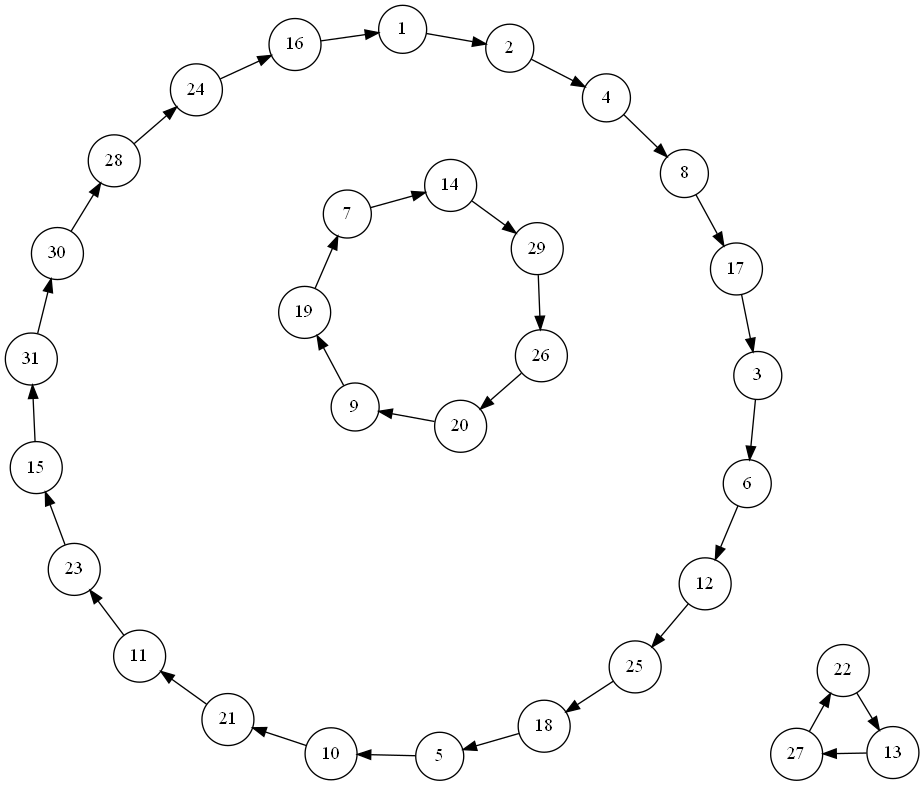

In [10]:
state_list = []
next_state = None
state = initial_state

while next_state not in state_list:
  # feedback function calcucates new bit
  new_bit = 0
  for tapped_cell in tapped_cells:
    new_bit = (new_bit + state[tapped_cell]) % 2
  
  # get state before shift
  current_state = get_state(state)
  state_list.append(current_state)

  # shift content of memory cells
  shifted_out_bit = state[0]
  for i in range(register_length - 1):
    state[i] = state[i+1]
  state[register_length - 1] = new_bit
  
  # get state after shift
  next_state = get_state(state)
  plot_edge(current_state, next_state)

plot(state_graph.string())